In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

#### I obtained the Fashion MNIST dataset from Kaggle, where the data is already split into training and testing sets. This pre-division simplifies the process, allowing for immediate use in training and evaluating machine learning models for clothing item recognition.

In [19]:
train_data = pd.read_csv('/Users/hetvishukla/Deep learning/project/fashion MNIST/fashion-mnist_train.csv')
test_data =  pd.read_csv('/Users/hetvishukla/Deep learning/project/fashion MNIST/fashion-mnist_test.csv')


### I showcased the dataset's details using various methods, including summary statistics, visualizations like histograms or scatter plots, and exploring individual samples. This comprehensive approach provides insights into the dataset's characteristics, aiding in understanding and model selection.

In [20]:
print("DataSet Information:")
print("-" * 30)
print('DF Shape: ' ,train_data.shape)
print('number of Columns: ' ,len(train_data.columns))
print('number of Observations: ' ,len(train_data))
print('Number of values in train: ' , train_data.count().sum())
print('Total Number of Missing values in train: ' , train_data.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(train_data.isna().sum().sum()/train_data.count().sum() *100),'%')
print('Total Number of Duplicated records in train : ' , train_data.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(train_data.duplicated().sum().sum()/train_data.count().sum() *100),'%')


DataSet Information:
------------------------------
DF Shape:  (60000, 785)
number of Columns:  785
number of Observations:  60000
Number of values in train:  47100000
Total Number of Missing values in train:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in train :  43
percentage of Duplicated values :  0.00 %


In [21]:
train_data.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

In [22]:
train_data.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [23]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (60000, 785)
Test set shape: (10000, 785)


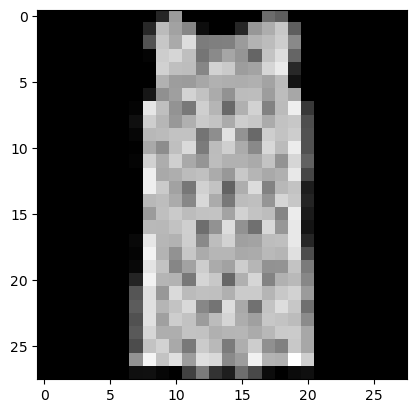

In [24]:
pixels = train_data.iloc[18, 1:]  
image = pixels.values.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.show()

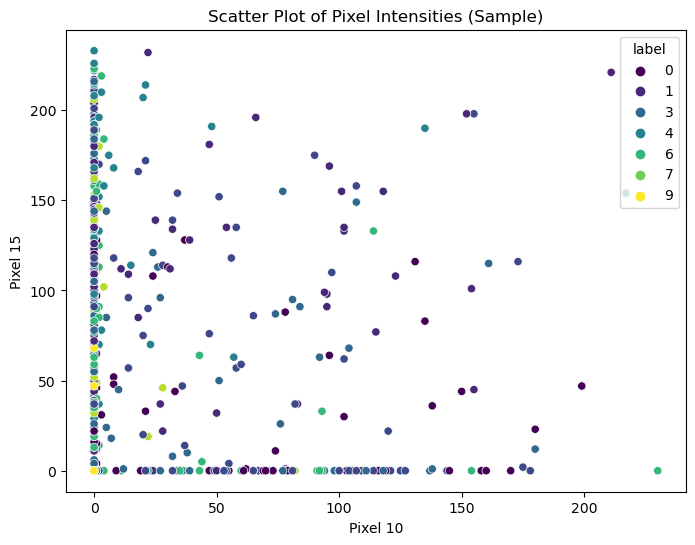

In [25]:
# Visualize scatter plot (for only two features for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data.sample(1000), x='pixel10', y='pixel15', hue='label', palette='viridis')
plt.title("Scatter Plot of Pixel Intensities (Sample)")
plt.xlabel("Pixel 10")
plt.ylabel("Pixel 15")
plt.show()

<Axes: xlabel='label', ylabel='count'>

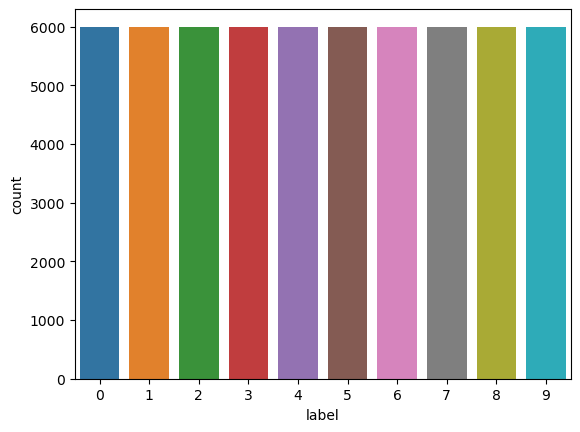

In [26]:
sns.countplot(x="label",data=train_data)

In [27]:
train_data['label'].value_counts().sort_index(ascending=True)

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

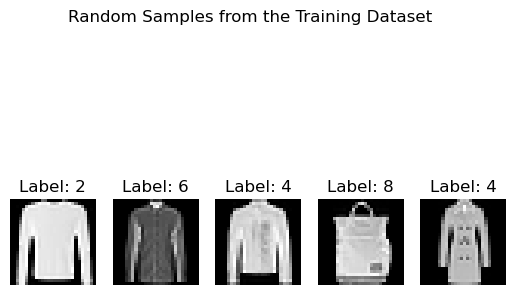

In [28]:
# Explore individual samples
sample_indices = np.random.randint(0, len(train_data), 5)
for i, index in enumerate(sample_indices):
    sample = train_data.iloc[index, 1:].values.reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample, cmap='gray')
    plt.title(f"Label: {train_data.iloc[index, 0]}")
    plt.axis('off')
plt.suptitle("Random Samples from the Training Dataset")
plt.show()

## Here, I processed the Fashion MNIST data by reshaping images, normalizing pixel values, and splitting it into training and testing sets. This prepares the data for training a model to recognize clothing items effectively.


In [29]:
def data_preprocessing(train_data, test_data):
    # Normalize data
    train_data_normalized = (train_data - train_data.mean()) / train_data.std()
    test_data_normalized = (test_data - test_data.mean()) / test_data.std()
    
    return train_data_normalized, test_data_normalized

In [30]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [31]:
train_labels = train_data['label']
train_data.drop('label', axis=1, inplace=True)
test_labels = test_data['label']
test_data.drop('label', axis=1, inplace=True)

train_data, test_data = data_preprocessing(train_data, test_data)

In [33]:
train_data.head()

pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0 -0.009505 -0.022693 -0.028907 -0.041557 -0.057574 -0.070503 -0.098083   
1 -0.009505 -0.022693 -0.028907 -0.041557 -0.057574 -0.070503 -0.098083   
2 -0.009505 -0.022693 -0.028907 -0.041557 -0.057574 -0.070503 -0.098083   
3 -0.009505 -0.022693 -0.028907  0.366129  0.406796 -0.070503 -0.098083   
4 -0.009505 -0.022693 -0.028907 -0.041557 -0.057574 -0.070503 -0.098083   

     pixel8    pixel9   pixel10  ...  pixel775  pixel776  pixel777  pixel778  \
0 -0.155980 -0.238544 -0.377956  ... -0.601707 -0.476941 -0.395151 -0.406437   
1 -0.155980 -0.238544 -0.377956  ... -0.601707 -0.476941 -0.395151 -0.406437   
2  0.198797 -0.238544 -0.377956  ... -0.601707 -0.476941 -0.395151  0.275908   
3 -0.155980 -0.238544 -0.377956  ... -0.549575 -0.476941 -0.395151 -0.406437   
4 -0.155980 -0.238544 -0.377956  ... -0.601707 -0.476941 -0.395151 -0.406437   

   pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
0 -0.440181 -0.396716 -0.287715 -0.158257 -0.091431 -0.033045  
1 -0.440181 -0.396716 -0.287715 -0.158257 -0.091431 -0.033045  
2  0.389446 -0.396716 -0.287715 -0.158257 -0.091431 -0.033045  
3 -0.440181 -0.374567 -0.287715 -0.158257 -0.091431 -0.033045  
4 -0.440181 -0.396716 -0.287715 -0.158257 -0.091431 -0.033045  

[5 rows x 784 columns]

In [32]:
train_data.hist(bins=20, figsize=(100, 80))
plt.suptitle("Histograms of Pixel Intensities")
plt.show()

In [34]:
train_images = train_data.values.reshape(-1,28,28)
test_images = test_data.values.reshape(-1,28,28)

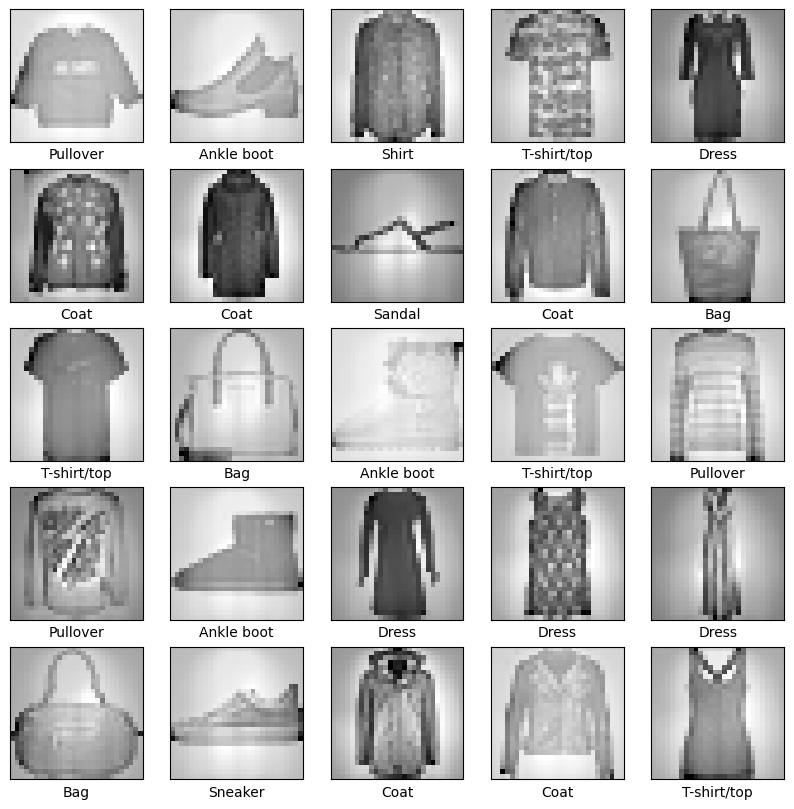

In [35]:
# Display some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

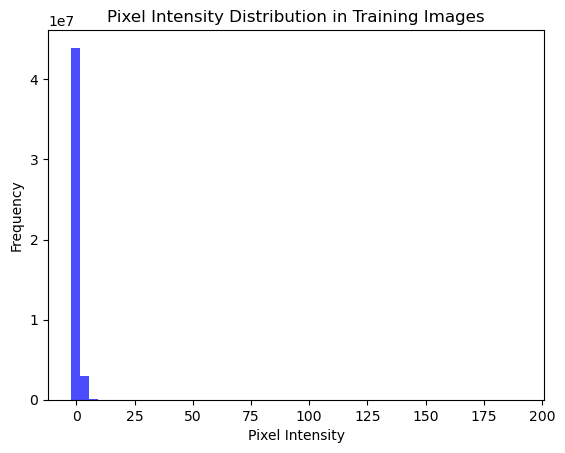

In [36]:
# Image pixel intensity distribution analysis
plt.figure()
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution in Training Images')
plt.show()

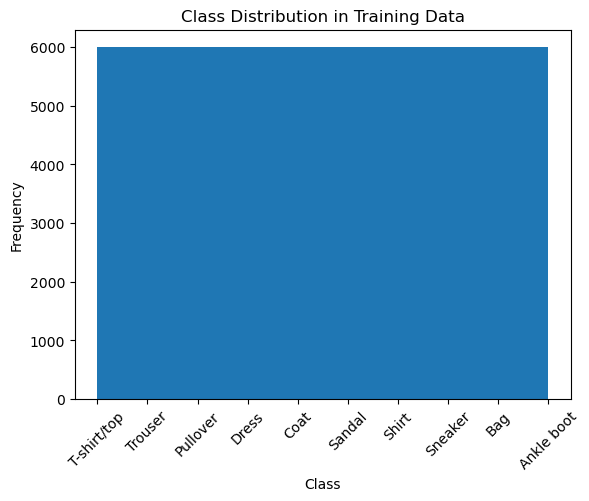

In [37]:
plt.figure()
plt.hist(train_labels, bins=len(class_names))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training Data')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.show()

# Experiment 1:

### In this experiment, we'll vary data parameters after analyzing and preprocessing the dataset. We'll explore how changes in these parameters affect our model's performance and learn which settings yield the best results.

#### For our first experiment, we'll use an Artificial Neural Network (ANN) with batch normalization and ReLU activation function. This setup aims to enhance the model's ability to learn complex patterns in the data by normalizing batches and introducing non-linearity through ReLU activation.

In [81]:
# ANN model with batch normalization
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


### The function trains a model with cross-validation.

### It tracks training and testing losses and accuracies for each epoch.

### The model is trained for a specified number of epochs (default is 10).

### For each epoch:
### It calculates the training loss and accuracy on the training data.

### It calculates the testing loss and accuracy on the testing data.

### Finally, it returns lists of training and testing losses, as well as training and testing accuracies over the epochs.


In [82]:
def train_model_with_cv(model, criterion, optimizer, train_loader, test_loader, num_epochs=10):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    for epoch in range(num_epochs):
        running_train_loss = 0.0
        running_train_corrects = 0
        running_test_loss = 0.0
        running_test_corrects = 0
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            running_train_corrects += torch.sum(preds == labels.data)

        epoch_train_loss = running_train_loss / len(train_loader)
        train_losses.append(epoch_train_loss)
        epoch_train_acc = running_train_corrects.double() / len(train_loader.dataset)
        train_accs.append(epoch_train_acc)

        model.eval()
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_test_loss += loss.item()
                running_test_corrects += torch.sum(preds == labels.data)

        epoch_test_loss = running_test_loss / len(test_loader)
        test_losses.append(epoch_test_loss)
        epoch_test_acc = running_test_corrects.double() / len(test_loader.dataset)
        test_accs.append(epoch_test_acc)

        # print(f'Epoch [{epoch + 1}/{num_epochs}], '
        #       f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, '
        #       f'Test Loss: {epoch_test_loss:.4f}, Test Acc: {epoch_test_acc:.4f}')

    return train_losses, test_losses, train_accs, test_accs

##### Define k-fold cross-validation: Split the training data into 5 folds, shuffling the data before splitting.
##### For each fold:
Print the current fold number.

Split the data into training and validation sets based on the fold index.

Initialize an Artificial Neural Network (ANN) model with input size, hidden size, and number of classes.

Define the loss function as Cross Entropy Loss and optimizer as Stochastic Gradient Descent (SGD) with a learning rate of 0.01.

Convert training and validation data into DataLoader objects with a batch size of 64.

Train the model using the train_model_with_cv function, passing the model, criterion, optimizer, training DataLoader, and validation DataLoader for 100 epochs.

Plot the training and validation loss curves for the current fold.

Plot the training and validation accuracy curves for the current fold.





In [84]:
train_tensor = torch.tensor(train_data.values, dtype=torch.float32)
test_tensor =  torch.tensor(test_data.values, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels.values)
test_labels_tensor = torch.tensor(test_labels.values)

train_labels.describe()

print("Train images shape:", train_tensor.shape)
print("Train labels length:", len(train_labels_tensor))
print("Test images shape:", test_tensor.shape)
print("Test labels length:", len(test_labels_tensor))

Train images shape: torch.Size([60000, 784])
Train labels length: 60000
Test images shape: torch.Size([10000, 784])
Test labels length: 10000


Fold 1


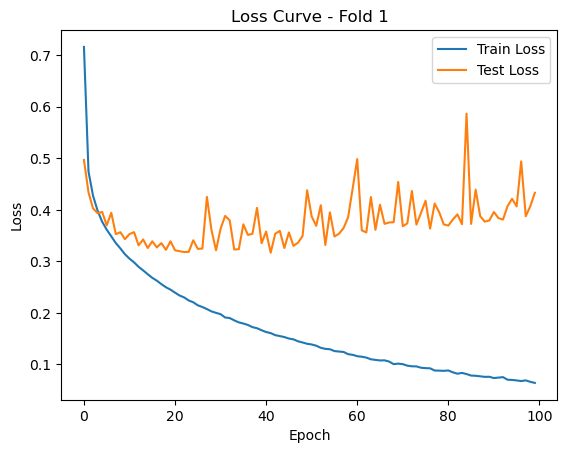

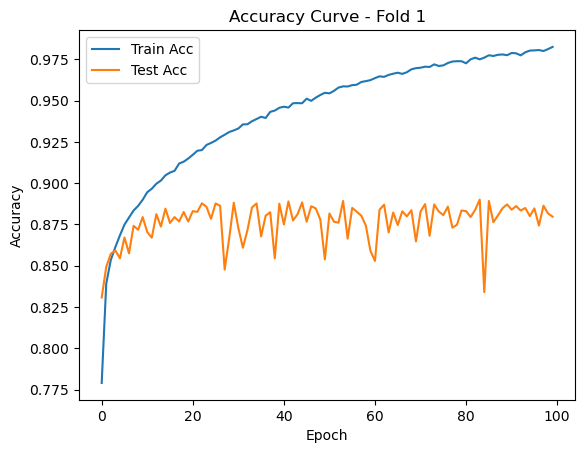

Fold 2


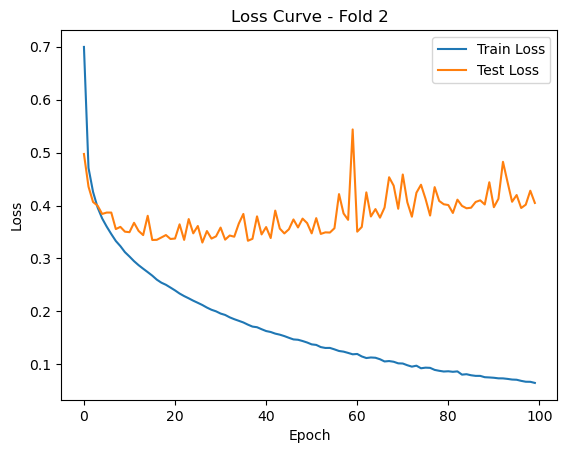

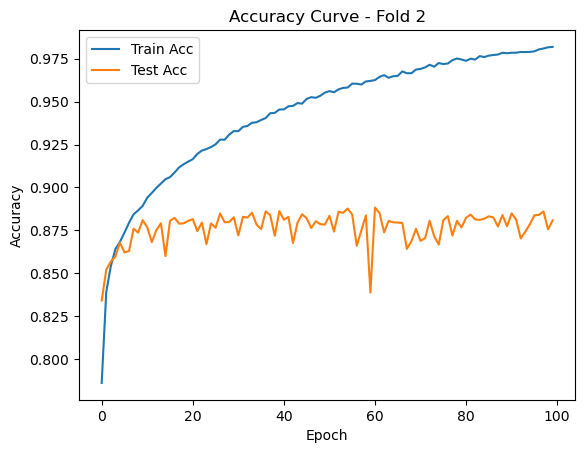

Fold 3


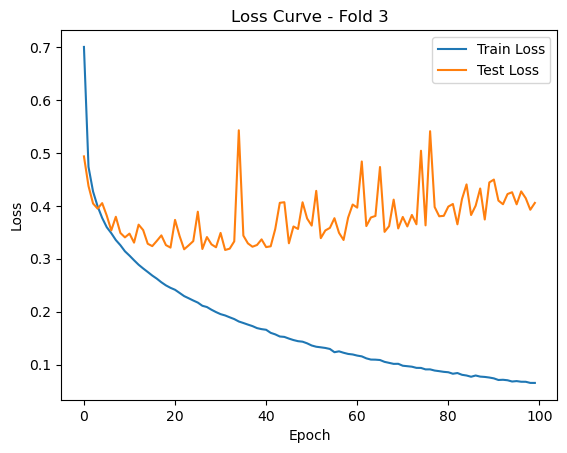

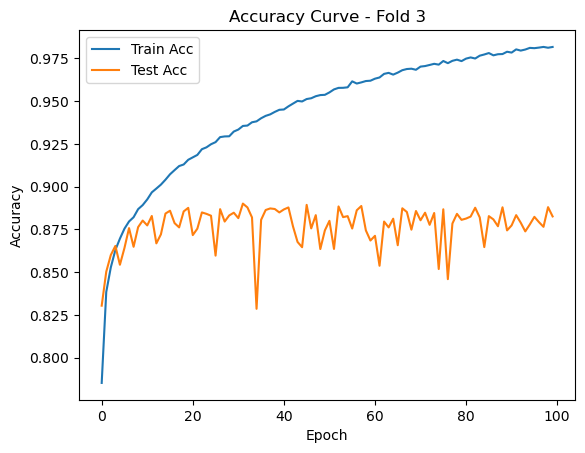

Fold 4


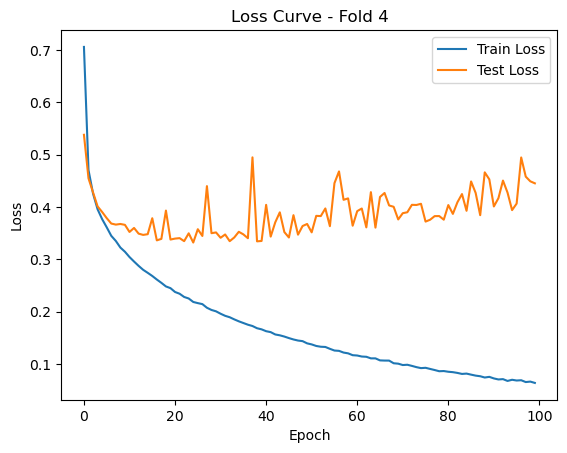

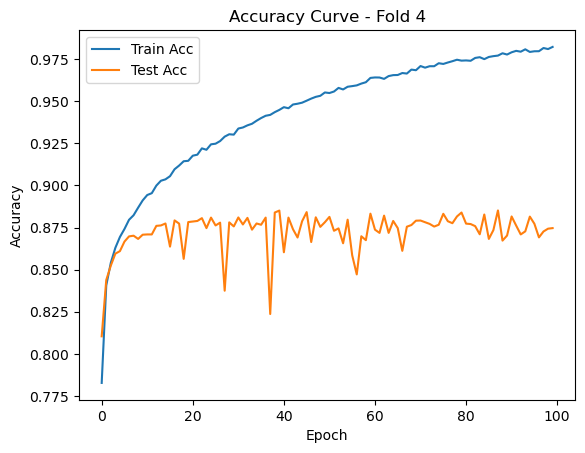

Fold 5


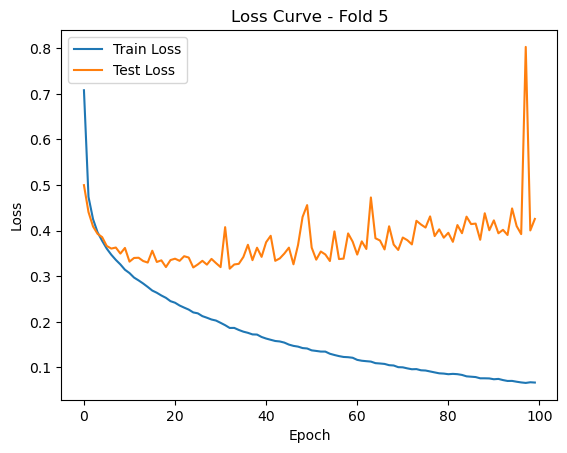

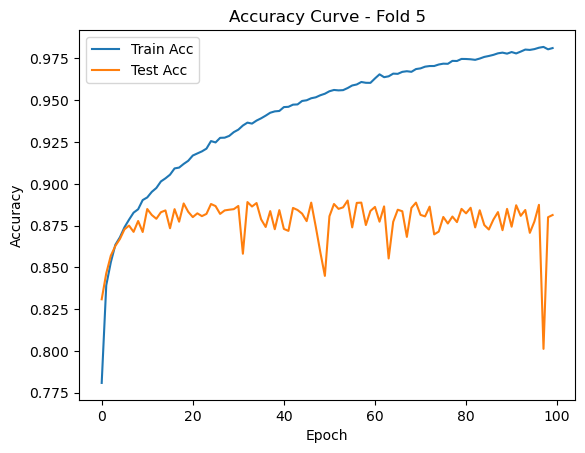

Final Test Loss: [0.4331407284245212, 0.40488254144153696, 0.4055611889888632, 0.44546500958026725, 0.42571213048823336]
Final Test Accuracy: [tensor(0.8798, dtype=torch.float64), tensor(0.8808, dtype=torch.float64), tensor(0.8826, dtype=torch.float64), tensor(0.8747, dtype=torch.float64), tensor(0.8813, dtype=torch.float64)]


In [89]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
test_losses_final = []
test_accs_final = []

fold = 0
for train_index, test_index in kf.split(train_tensor):
    fold += 1
    print(f"Fold {fold}")
    train_data_fold, val_data_fold = train_tensor[train_index], train_tensor[test_index]
    train_labels_fold, val_labels_fold = train_labels_tensor[train_index], train_labels_tensor[test_index]

    #Initialize ANN model
    input_size = train_tensor.shape[1]
    hidden_size = 128
    num_classes = 10
    model = ANN(input_size, hidden_size, num_classes)

    #  Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    #  Convert to DataLoader
    train_dataset = torch.utils.data.TensorDataset(train_data_fold, train_labels_fold)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = torch.utils.data.TensorDataset(val_data_fold, val_labels_fold)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

    # Train the model with k-fold cross-validation
    train_losses, test_losses, train_accs, test_accs = train_model_with_cv(model, criterion, optimizer,
                                                                         train_loader, val_loader, num_epochs=100)

    #  Plot loss and accuracy curves
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve - Fold {fold}')
    plt.legend()
    plt.show()

    plt.plot(train_accs, label='Train Acc')
    plt.plot(test_accs, label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve - Fold {fold}')
    plt.legend()
    plt.show()

    test_losses_final.append(test_losses[-1])
    test_accs_final.append(test_accs[-1])
    
print("Final Test Loss:", test_losses_final)
print("Final Test Accuracy:", test_accs_final)

In [92]:
print("Final Test Accuracy:", test_accs_final[1:])

Final Test Accuracy: [tensor(0.8808, dtype=torch.float64), tensor(0.8826, dtype=torch.float64), tensor(0.8747, dtype=torch.float64), tensor(0.8813, dtype=torch.float64)]


In [103]:
test_accs_final[1]

tensor(0.8808, dtype=torch.float64)

#### In this experiment, we're varying the size of the hidden layer in our neural network model to see how it affects the training and testing accuracies and losses.

#### For each hidden layer size (64, 128, 256):
#### We use 5-fold cross-validation to split the data into training and validation sets.

### For each fold:

#### We train the model using the specified hidden layer size and evaluate its performance.

#### We store the training and testing losses, as well as the accuracies, for each fold.

#### After evaluating all folds, we plot the training and testing loss curves, as well as the accuracy curves, for each hidden layer size.

#### Finally, we print the final test accuracy and test loss for each hidden layer size to compare the performance of the models with different hidden layer sizes.






In [104]:
def senario():
    # Define configurations to compare
    hidden_sizes = [64, 128, 256]  # Vary the hidden layer sizes
    
    # Define k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True)
    
    results = []
    
    for hidden_size in hidden_sizes:
        fold_results = []
        
        for fold, (train_index, test_index) in enumerate(kf.split(train_tensor), 1):
            print(f"\nFold {fold}, Hidden Size {hidden_size}")
            train_data_fold, val_data_fold = train_tensor[train_index], train_tensor[test_index]
            train_labels_fold, val_labels_fold = train_labels_tensor[train_index], train_labels_tensor[test_index]

            # Initialize ANN model with current hidden size
            model = ANN(train_tensor.shape[1], hidden_size, 10)

            # Loss function and optimizer
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.SGD(model.parameters(), lr=0.01)

            # Convert to DataLoader
            train_dataset = torch.utils.data.TensorDataset(train_data_fold, train_labels_fold)
            train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
            val_dataset = torch.utils.data.TensorDataset(val_data_fold, val_labels_fold)
            val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

            # Train the model with k-fold cross-validation
            train_losses, test_losses, train_accs, test_accs = train_model_with_cv(model, criterion, optimizer,
                                                                                 train_loader, val_loader, num_epochs=100)

            # Store results
            fold_results.append({
                'hidden_size': hidden_size,
                'train_losses': train_losses,
                'test_losses': test_losses,
                'train_accs': train_accs,
                'test_accs': test_accs
            })
        
        results.append(fold_results)
    
    return results



Fold 1, Hidden Size 64

Fold 2, Hidden Size 64

Fold 3, Hidden Size 64

Fold 4, Hidden Size 64

Fold 5, Hidden Size 64

Fold 1, Hidden Size 128

Fold 2, Hidden Size 128

Fold 3, Hidden Size 128

Fold 4, Hidden Size 128

Fold 5, Hidden Size 128

Fold 1, Hidden Size 256

Fold 2, Hidden Size 256

Fold 3, Hidden Size 256

Fold 4, Hidden Size 256

Fold 5, Hidden Size 256


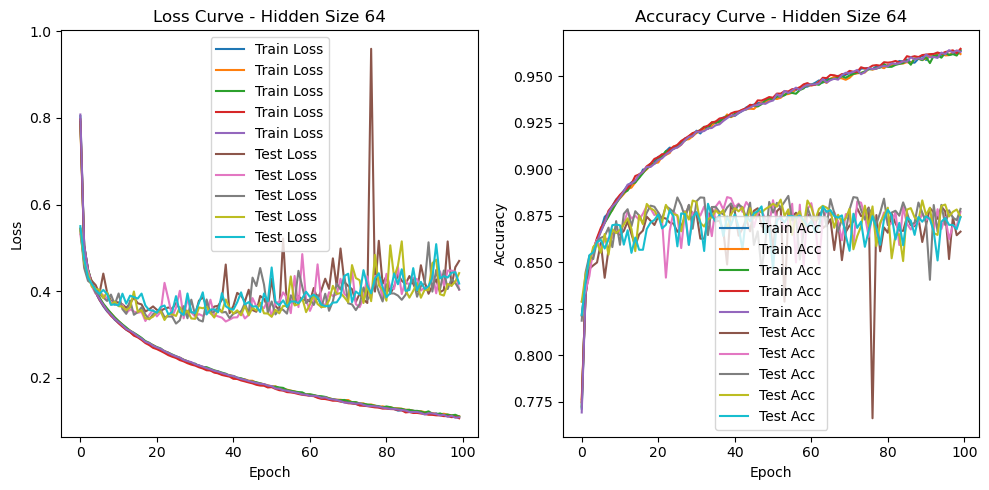

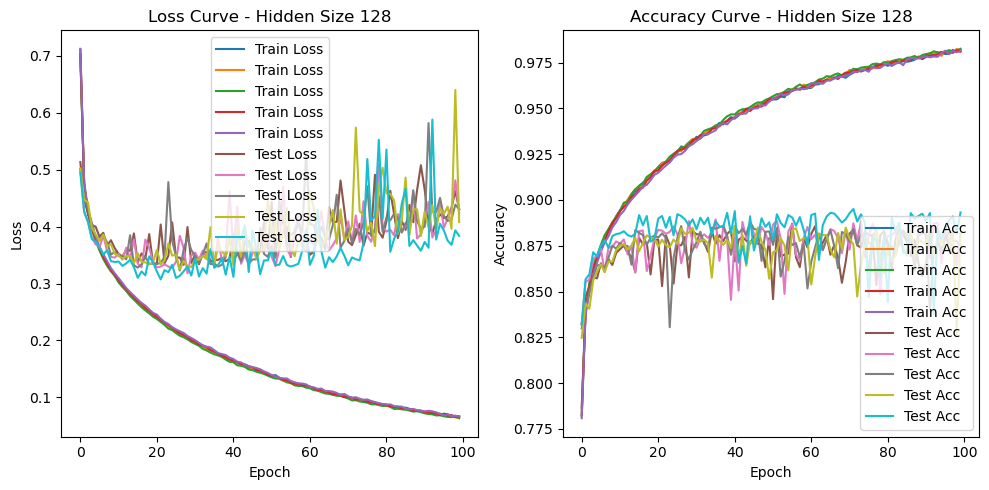

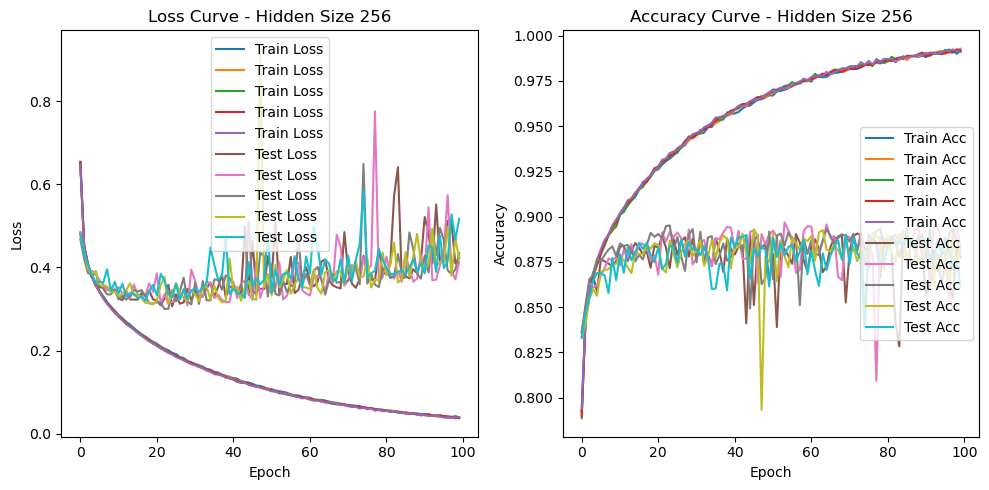

In [105]:
results = senario()
for fold_results in results:
    hidden_size = fold_results[0]['hidden_size']
    train_losses_all_folds = [fold['train_losses'] for fold in fold_results]
    test_losses_all_folds = [fold['test_losses'] for fold in fold_results]
    train_accs_all_folds = [fold['train_accs'] for fold in fold_results]
    test_accs_all_folds = [fold['test_accs'] for fold in fold_results]
    
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    for train_losses in train_losses_all_folds:
        plt.plot(train_losses, label='Train Loss')
    for test_losses in test_losses_all_folds:
        plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve - Hidden Size {hidden_size}')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    for train_accs in train_accs_all_folds:
        plt.plot(train_accs, label='Train Acc')
    for test_accs in test_accs_all_folds:
        plt.plot(test_accs, label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve - Hidden Size {hidden_size}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [144]:
fold_results = results[2]  # Assuming the results list contains results for hidden layer size of 64

hidden_size = results[0][-1]['hidden_size']
test_losses = results[0][-1]['test_losses'][-1]  # Final test loss
test_accs = results[0][-1]['test_accs'][-1]  # Final test accuracy

print(hidden_size)
print(test_losses)
print(test_accs.item())

64
0.4177402179054123
0.8743333333333333


In [106]:
for fold_results in results:
    for fold in fold_results:
        hidden_size = fold['hidden_size']
        test_losses = fold['test_losses'][-1]  # Final test loss
        test_accs = fold['test_accs'][-1]  # Final test accuracy
        
        print(f"Hidden Layer Size: {hidden_size}, Final Test Loss: {test_losses:.4f}, Final Test Accuracy: {test_accs:.4f}")

Hidden Layer Size: 64, Final Test Loss: 0.4700, Final Test Accuracy: 0.8665
Hidden Layer Size: 64, Final Test Loss: 0.4035, Final Test Accuracy: 0.8772
Hidden Layer Size: 64, Final Test Loss: 0.4041, Final Test Accuracy: 0.8788
Hidden Layer Size: 64, Final Test Loss: 0.4419, Final Test Accuracy: 0.8745
Hidden Layer Size: 64, Final Test Loss: 0.4177, Final Test Accuracy: 0.8743
Hidden Layer Size: 128, Final Test Loss: 0.4307, Final Test Accuracy: 0.8754
Hidden Layer Size: 128, Final Test Loss: 0.4240, Final Test Accuracy: 0.8820
Hidden Layer Size: 128, Final Test Loss: 0.4308, Final Test Accuracy: 0.8742
Hidden Layer Size: 128, Final Test Loss: 0.4080, Final Test Accuracy: 0.8821
Hidden Layer Size: 128, Final Test Loss: 0.3837, Final Test Accuracy: 0.8932
Hidden Layer Size: 256, Final Test Loss: 0.4242, Final Test Accuracy: 0.8775
Hidden Layer Size: 256, Final Test Loss: 0.4134, Final Test Accuracy: 0.8835
Hidden Layer Size: 256, Final Test Loss: 0.4341, Final Test Accuracy: 0.8803
Hidd

#### Experiment Description:
#### Purpose: This experiment aims to compare the performance of an Artificial Neural Network (ANN) with different activation functions (ReLU and Sigmoid) using k-fold cross-validation.

#### Model Initialization: An ANN model is initialized with a fixed hidden layer size of 128 neurons and 10 output classes.

#### Cross-Validation Setup: The training data is split into 5 folds using k-fold cross-validation, with shuffling enabled to ensure randomness.

#### Activation Functions Evaluation:

#### For each activation function (ReLU and Sigmoid):
The ANN model is instantiated with the specified activation function.
The model is trained and evaluated separately for each fold of the cross-validation.
Training and validation losses, as well as accuracies, are computed and plotted for each fold.
Performance Comparison:

The loss and accuracy curves for each activation function are plotted separately for each fold.
This allows for a visual comparison of the performance of the ANN model with ReLU and Sigmoid activation functions across different folds.
Analysis:

By observing the loss and accuracy curves for each activation function, we can determine which activation function yields better performance in terms of convergence and accuracy.
Conclusion:

The experiment provides insights into the impact of activation functions on the performance of the ANN model, aiding in selecting the most suitable activation function for similar classification tasks.

In [107]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, activation):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Activation function: relu


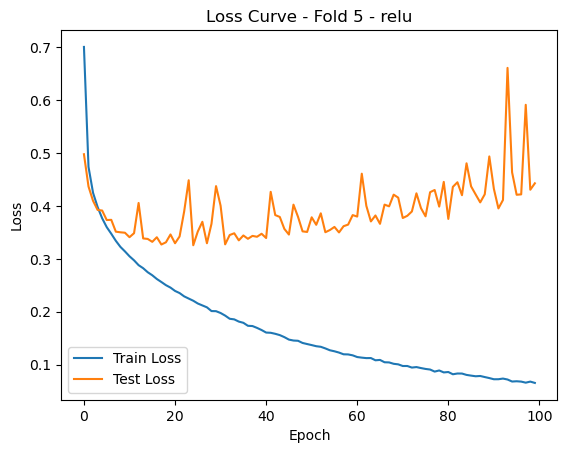

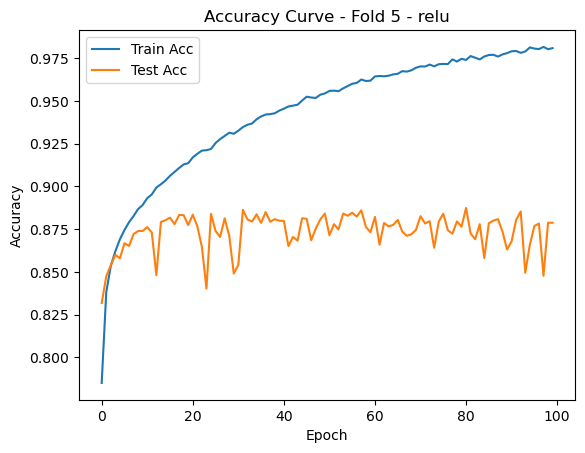

Activation function: sigmoid


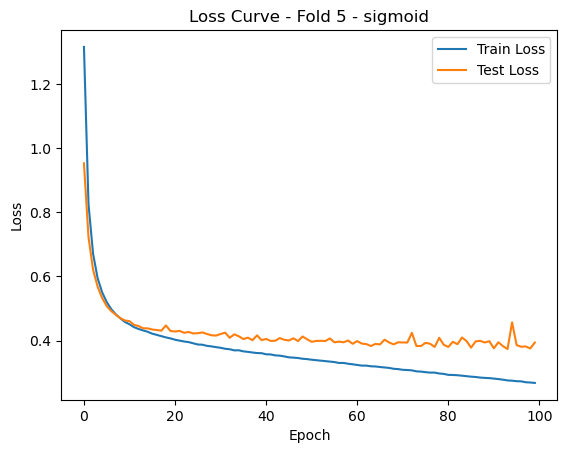

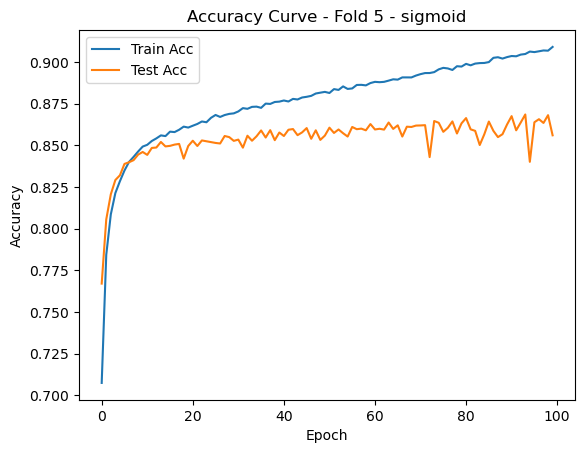

In [108]:
kf = KFold(n_splits=5, shuffle=True)
test_losses_final_ex3 = []
test_accs_final_ex3 = []
fold = 0
for train_index, test_index in kf.split(train_tensor):
    fold += 1
    print(f"Fold {fold}")
    train_data_fold, val_data_fold = train_tensor[train_index], train_tensor[test_index]
    train_labels_fold, val_labels_fold = train_labels_tensor[train_index], train_labels_tensor[test_index]

for activation in ['relu', 'sigmoid']:
    print(f"Activation function: {activation}")
    # Step 9: Initialize ANN model
    input_size = train_tensor.shape[1]
    hidden_size = 128
    num_classes = 10
    model = ANN(input_size, hidden_size, num_classes, activation)

    # Step 10: Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Step 11: Convert to DataLoader
    train_dataset = torch.utils.data.TensorDataset(train_data_fold, train_labels_fold)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = torch.utils.data.TensorDataset(val_data_fold, val_labels_fold)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

    # Step 12: Train the model with k-fold cross-validation
    train_losses, test_losses, train_accs, test_accs = train_model_with_cv(model, criterion, optimizer,
                                                                         train_loader, val_loader, num_epochs=100)

    # Step 13: Plot loss and accuracy curves
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve - Fold {fold} - {activation}')
    plt.legend()
    plt.show()

    plt.plot(train_accs, label='Train Acc')
    plt.plot(test_accs, label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve - Fold {fold} - {activation}')
    plt.legend()
    plt.show()

    test_losses_final_ex3.append(test_losses[-1])
    test_accs_final_ex3.append(test_accs[-1])


In [109]:
print("Final Test Loss:", test_losses_final_ex3)
print("Final Test Accuracy:", test_accs_final_ex3)

Final Test Loss: [0.4428927223099039, 0.3939495234888919]
Final Test Accuracy: [tensor(0.8788, dtype=torch.float64), tensor(0.8560, dtype=torch.float64)]


#### Objective: The experiment aims to compare the performance of an Artificial Neural Network (ANN) model using different learning rates and optimizers.

#### Learning Rate Variation: The experiment involves testing multiple learning rates to observe their impact on the model's convergence and performance.

#### Optimizer Selection: Different optimizers such as Stochastic Gradient Descent (SGD), Adam, and RMSprop are utilized to optimize the model parameters during training.

#### Model Training: The ANN model is trained separately for each combination of learning rate and optimizer, and its performance is evaluated using metrics like loss and accuracy.

#### Evaluation: By analyzing the performance metrics for each combination, insights are gained into which learning rate and optimizer combination yields the best performance for the given task.

#### Conclusion: The experiment helps in selecting the most effective learning rate and optimizer combination, contributing to improved model training and convergence.

In [110]:
test_losses_final_ex4 = []
test_accs_final_ex4 = []

Learning Rate: 0.001, Optimizer: SGD
Fold 1


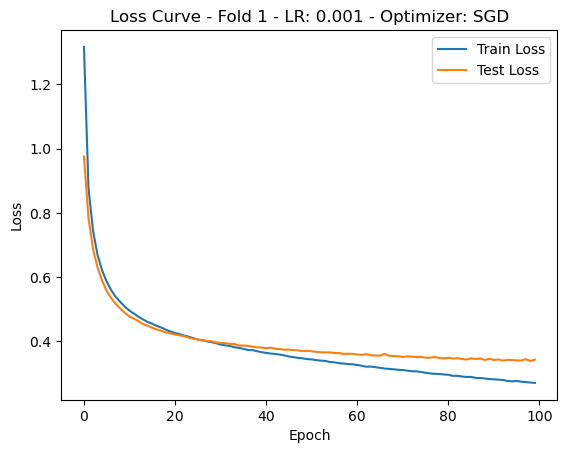

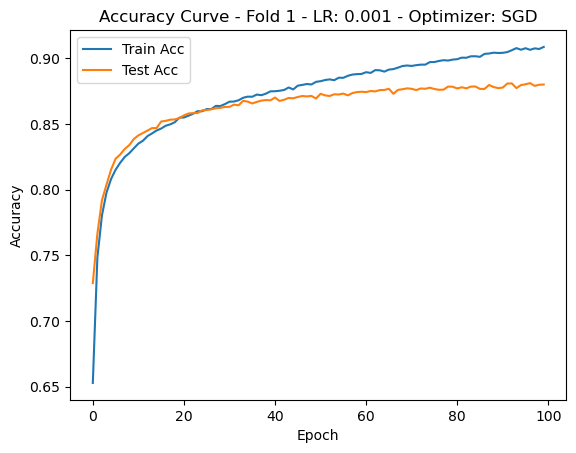

Fold 2


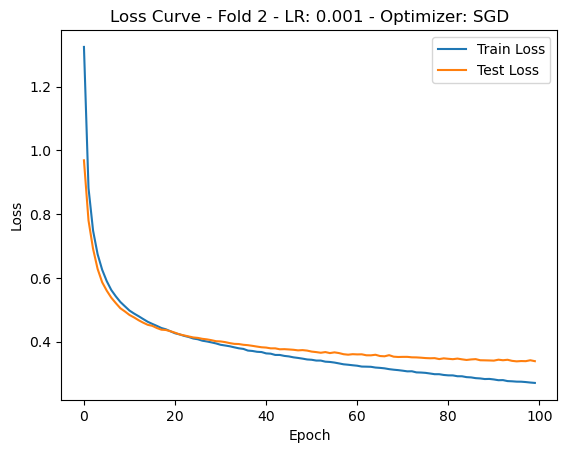

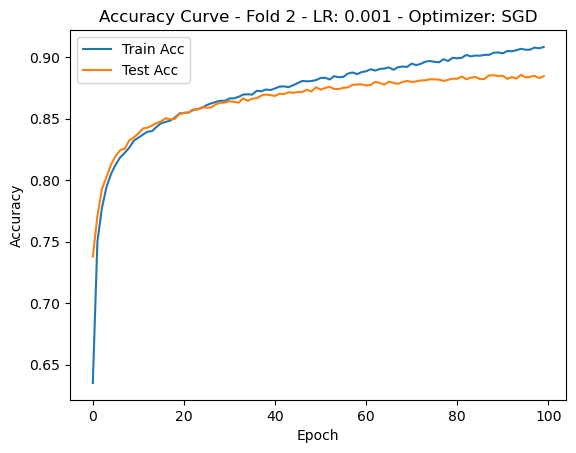

Fold 3


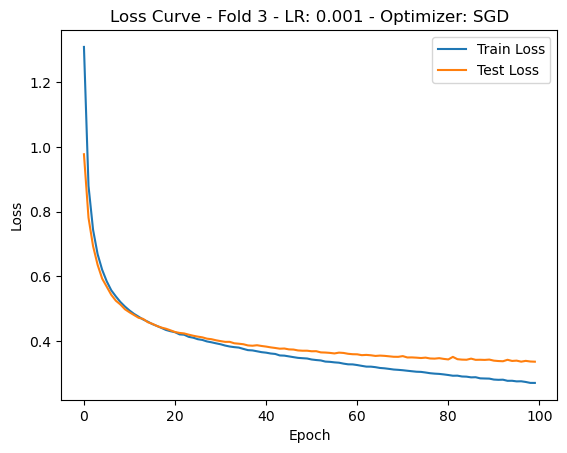

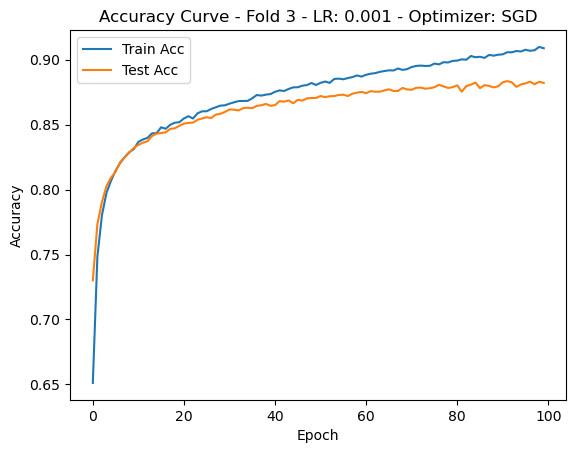

Fold 4


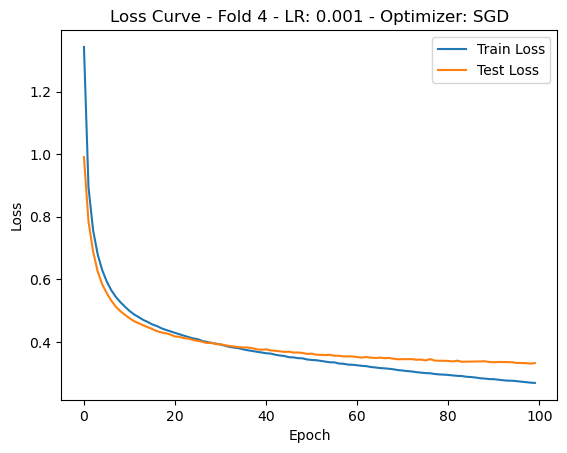

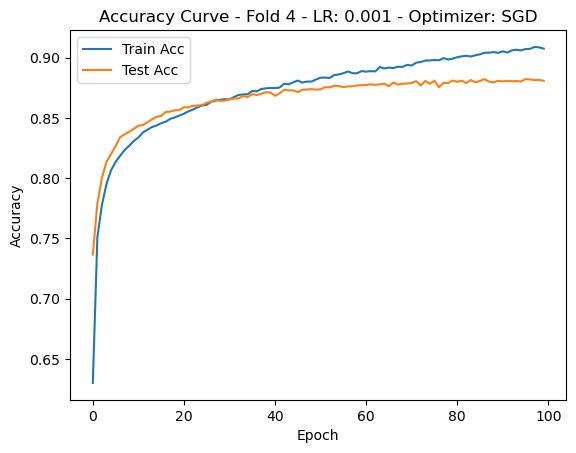

Fold 5


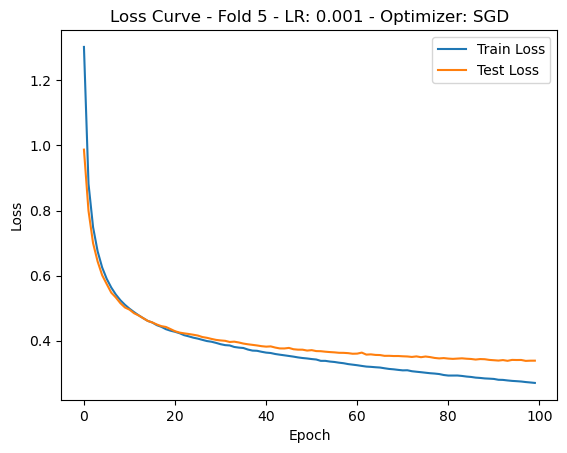

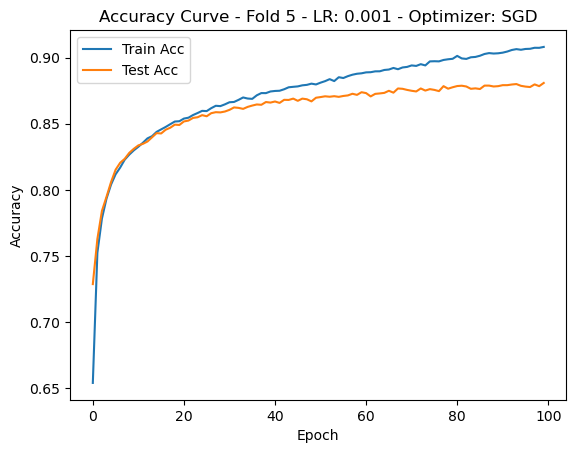

Learning Rate: 0.001, Optimizer: Adam
Fold 1


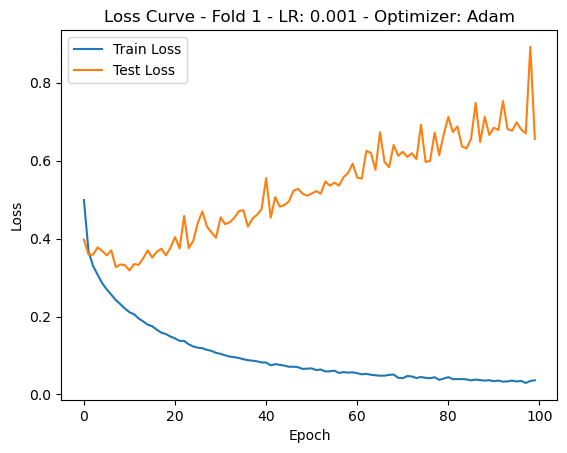

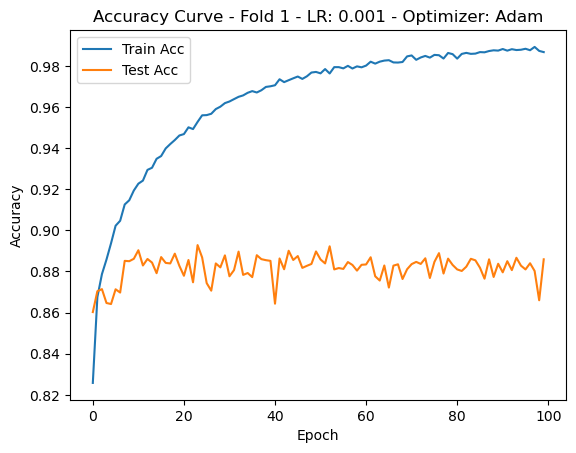

Fold 2


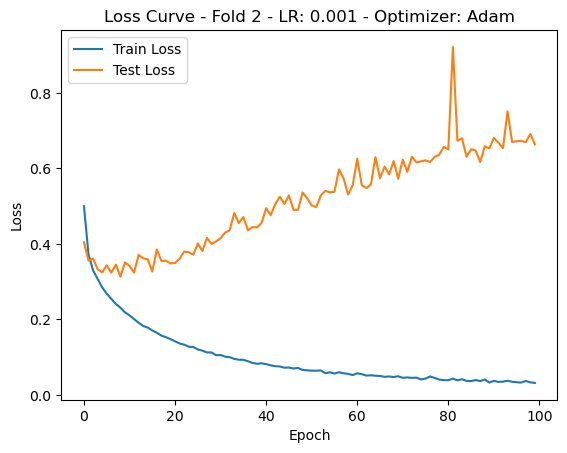

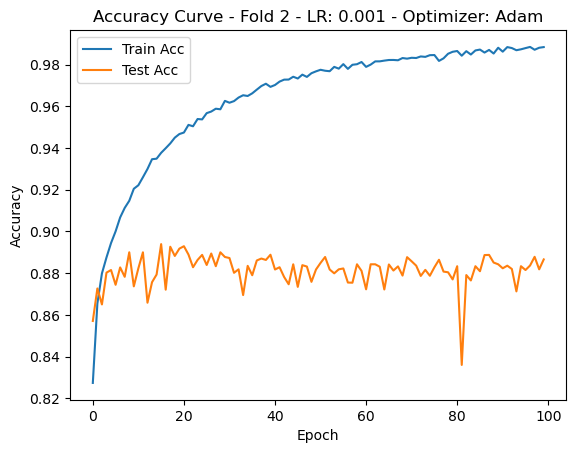

Fold 3


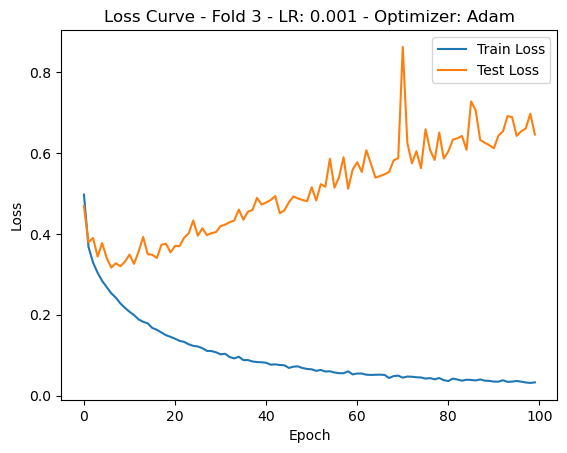

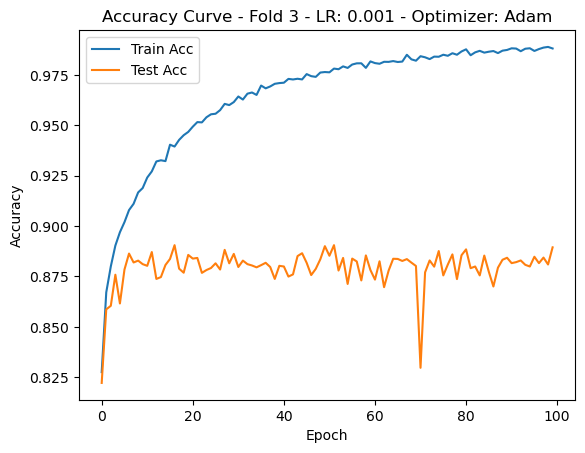

Fold 4


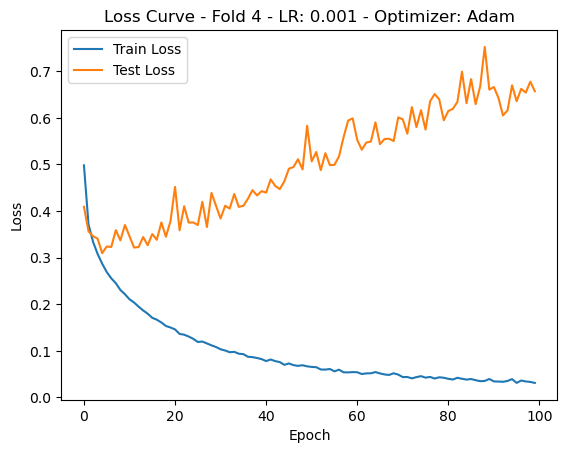

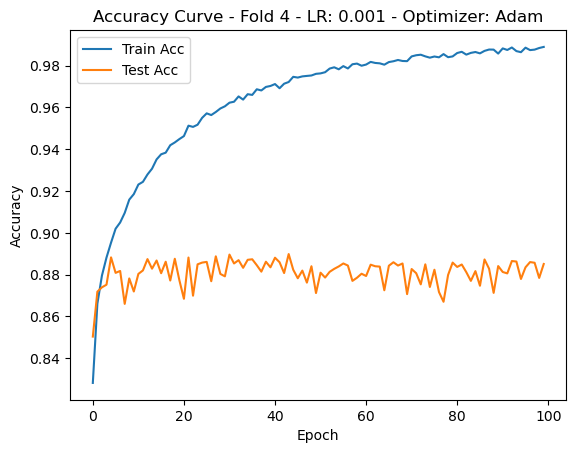

Fold 5


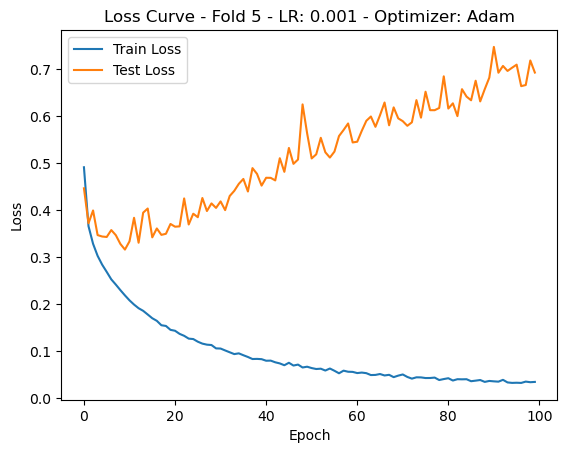

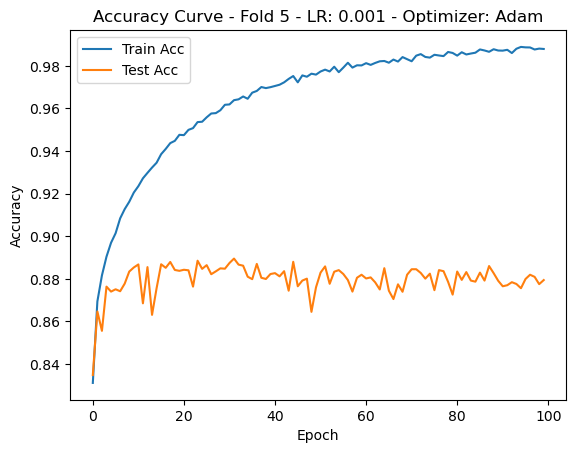

Learning Rate: 0.01, Optimizer: SGD
Fold 1


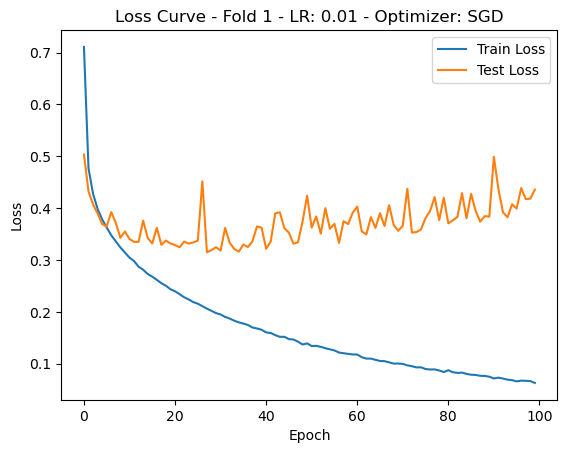

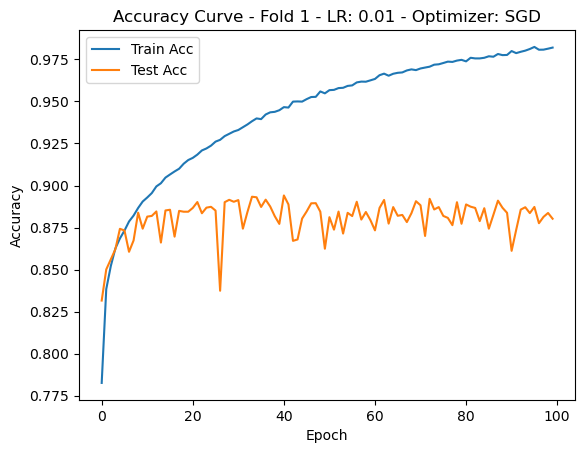

Fold 2


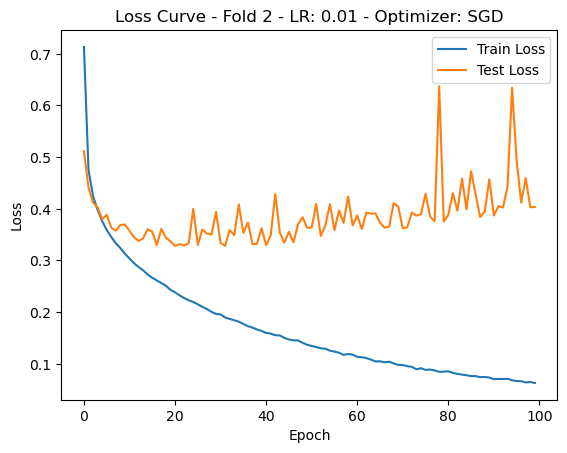

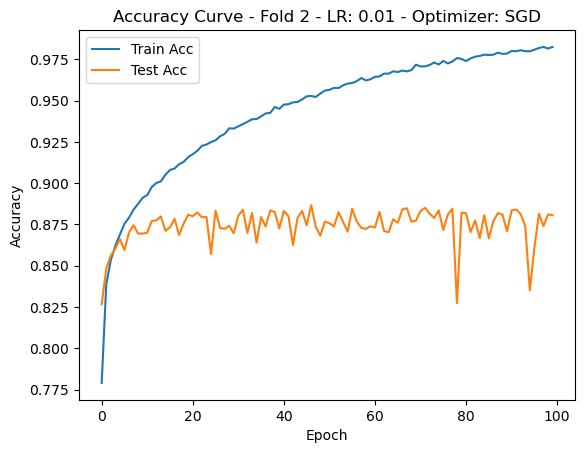

Fold 3


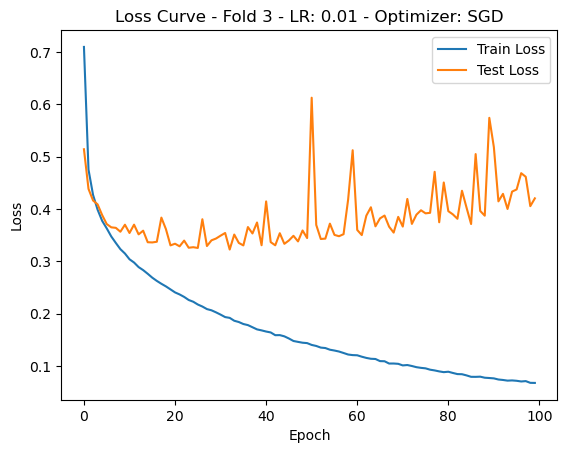

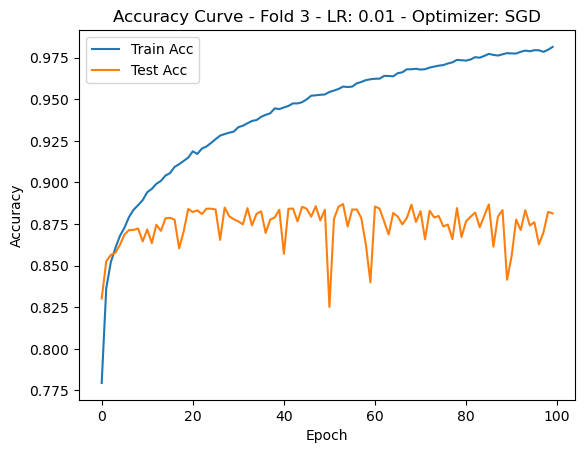

Fold 4


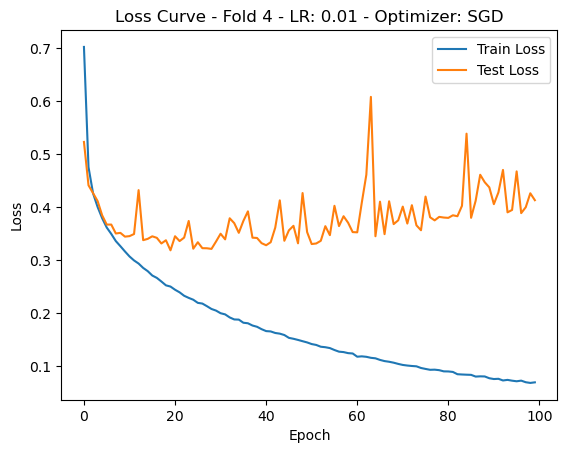

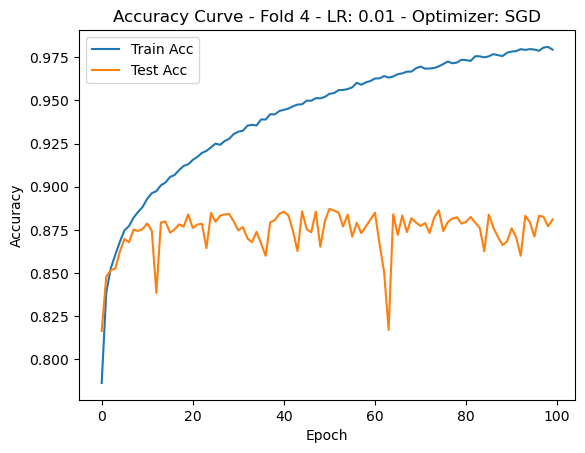

Fold 5


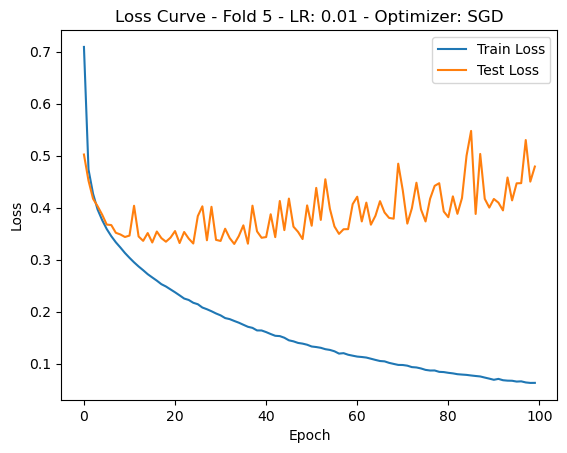

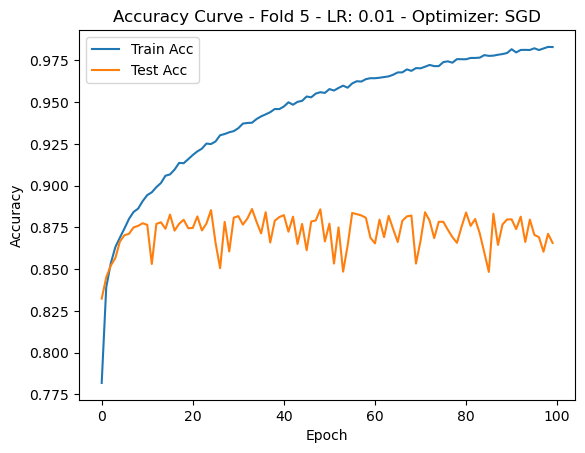

Learning Rate: 0.01, Optimizer: Adam
Fold 1


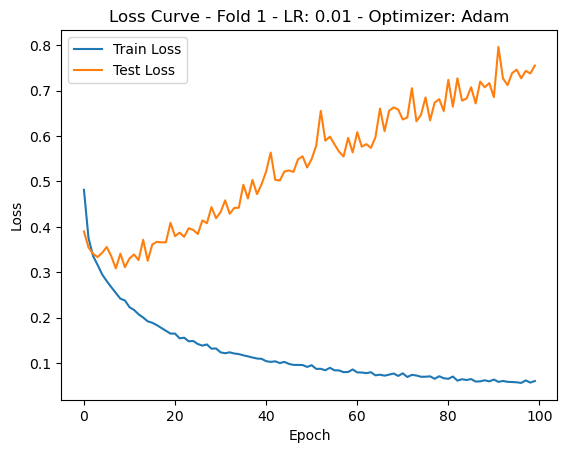

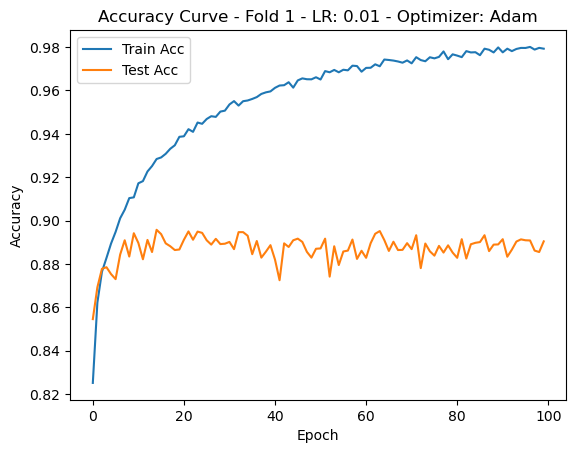

Fold 2


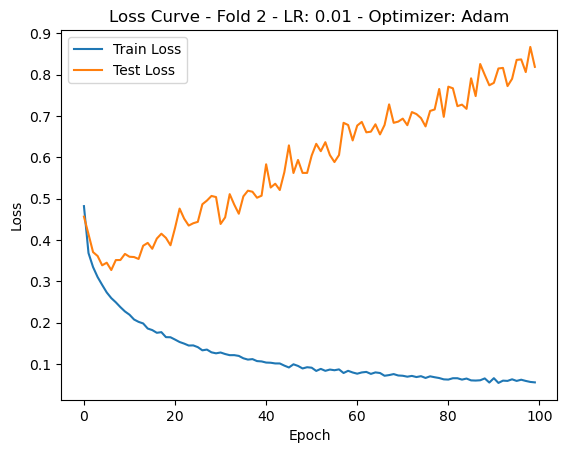

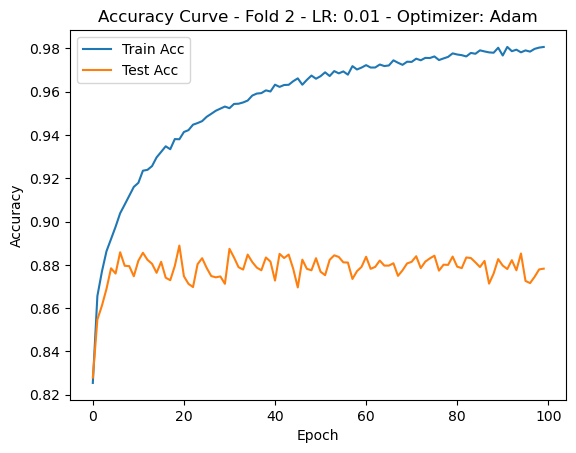

Fold 3


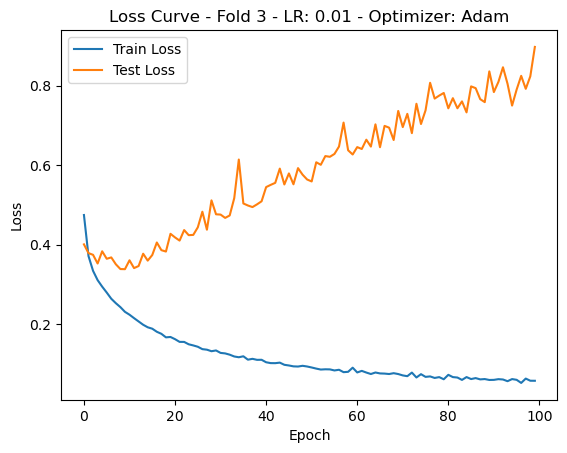

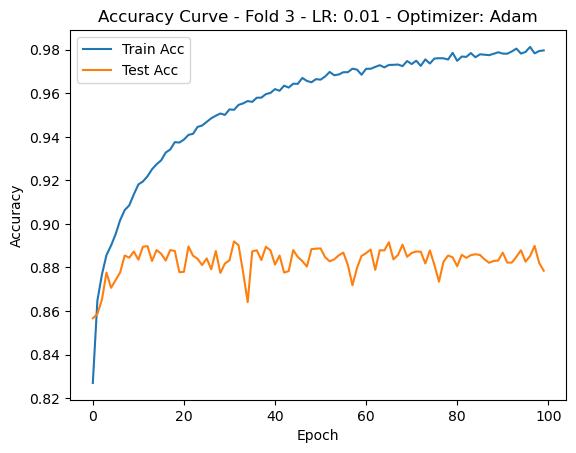

Fold 4


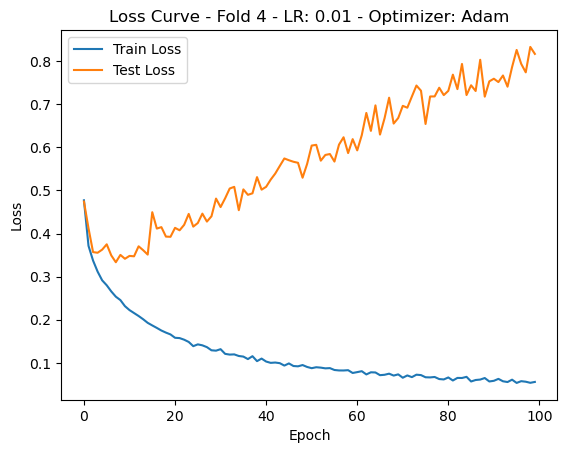

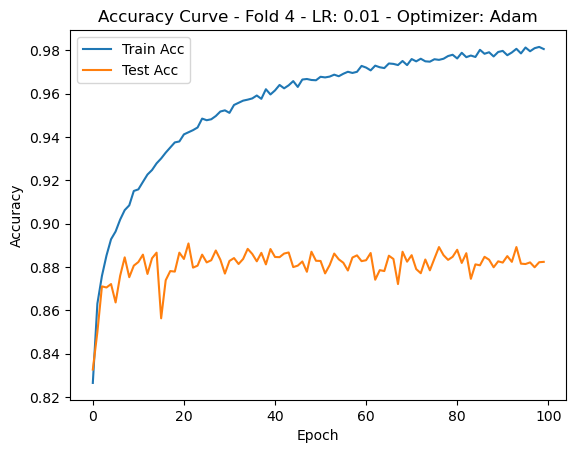

Fold 5


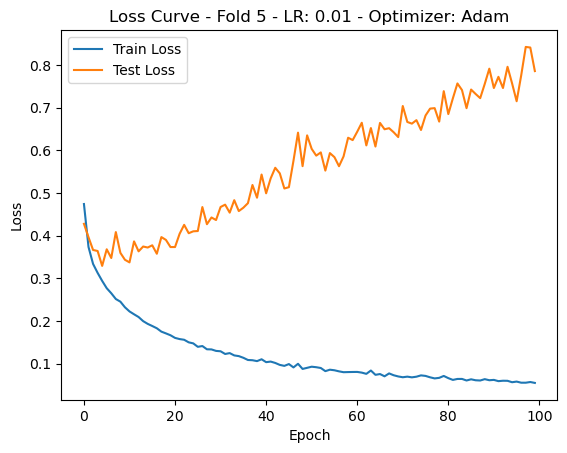

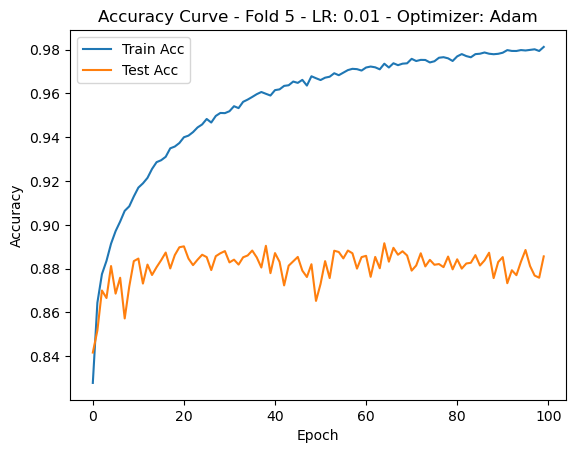

Learning Rate: 0.1, Optimizer: SGD
Fold 1


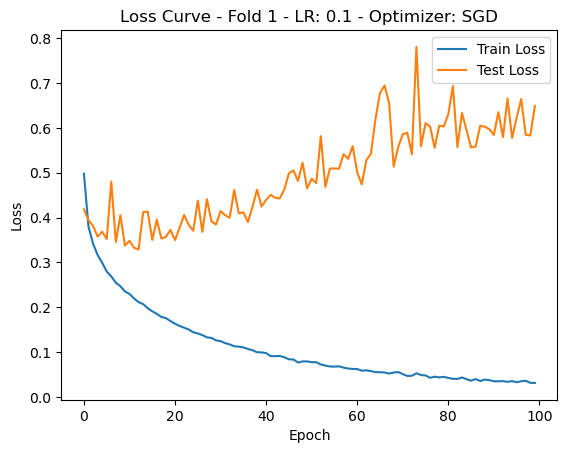

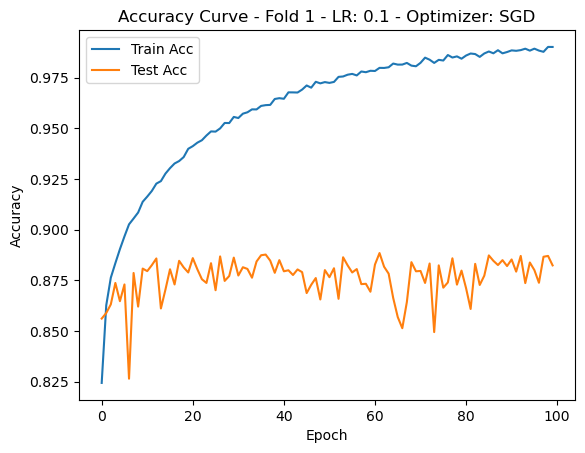

Fold 2


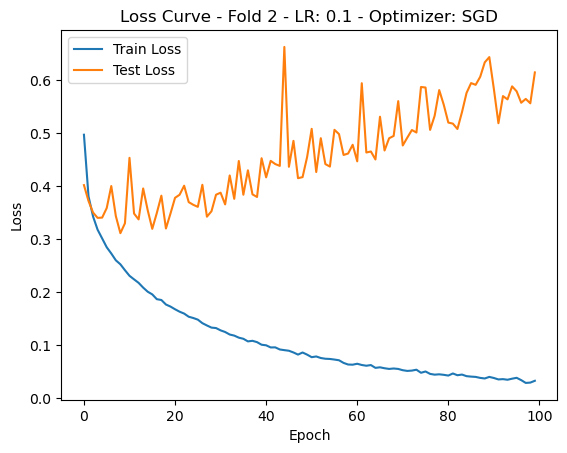

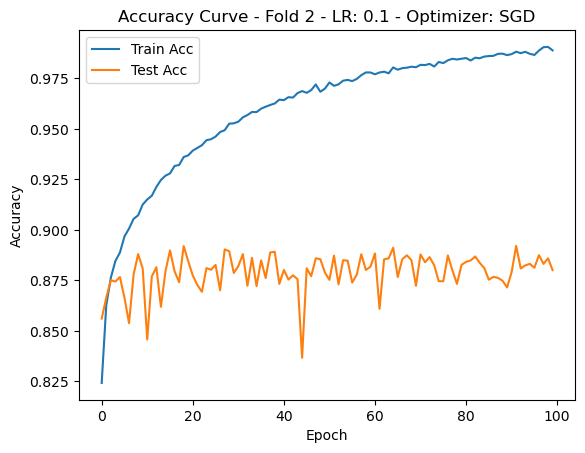

Fold 3


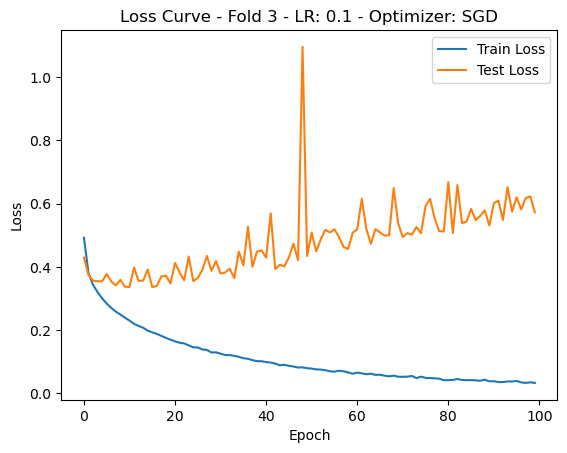

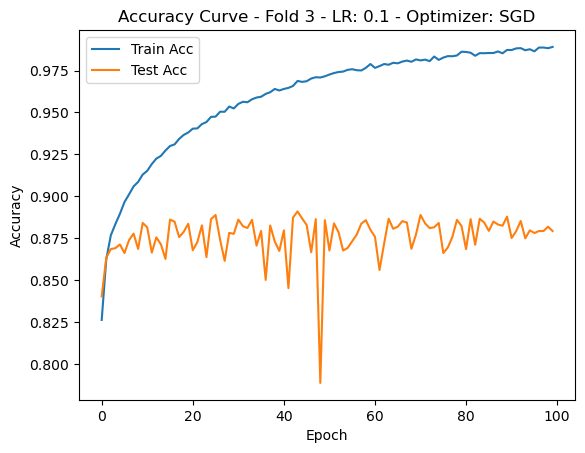

Fold 4


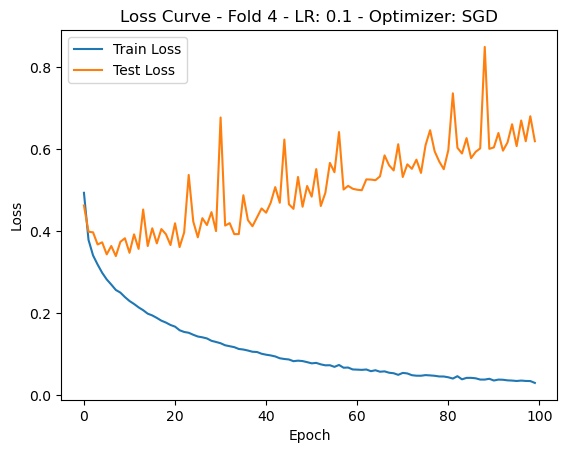

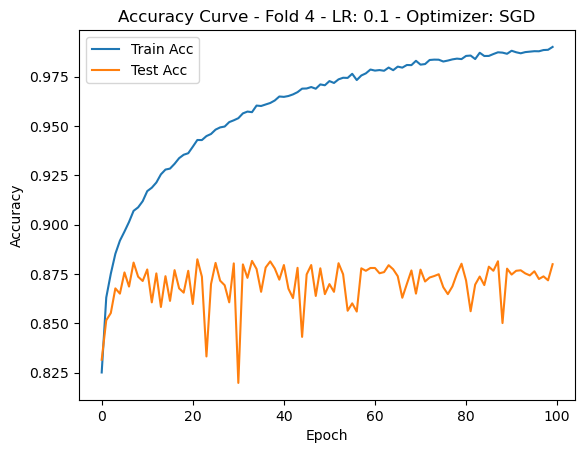

Fold 5


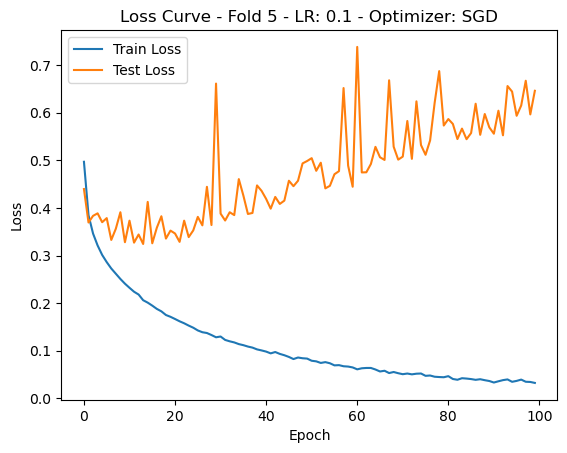

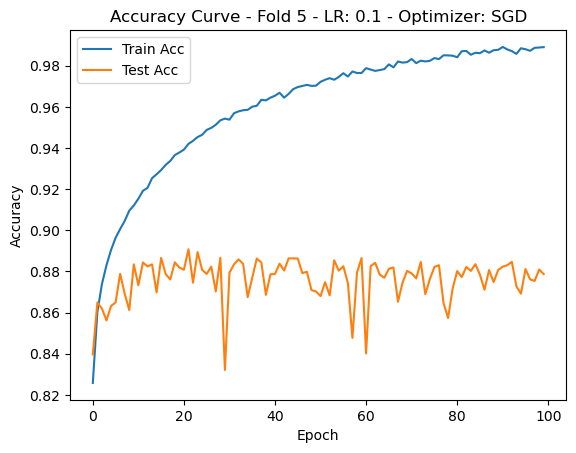

Learning Rate: 0.1, Optimizer: Adam
Fold 1


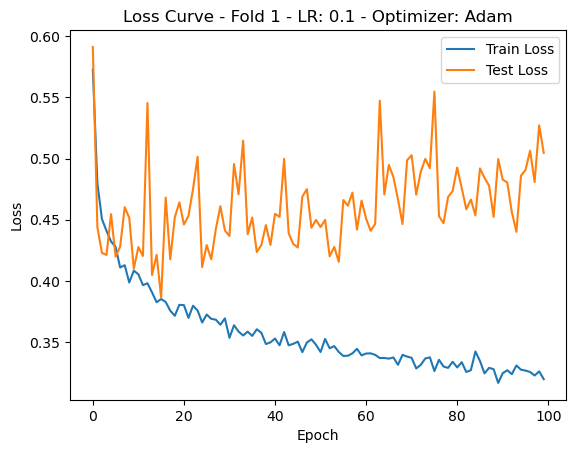

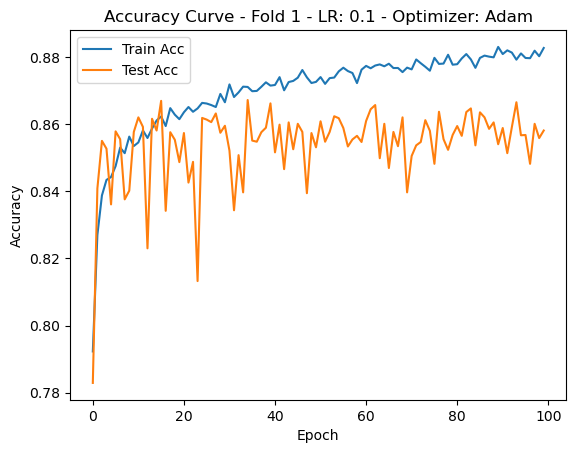

Fold 2


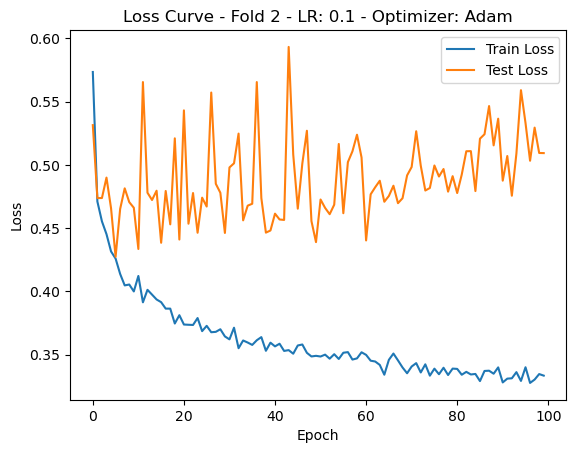

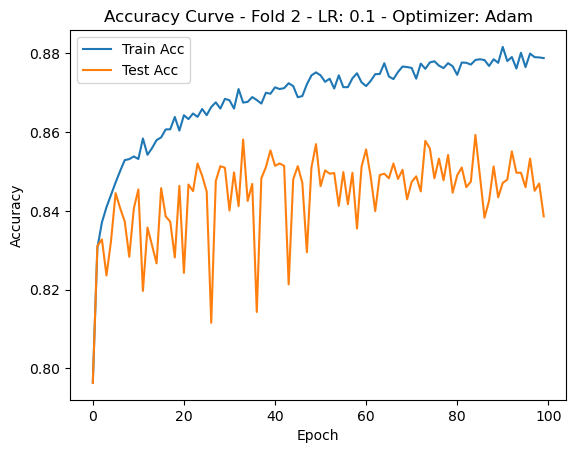

Fold 3


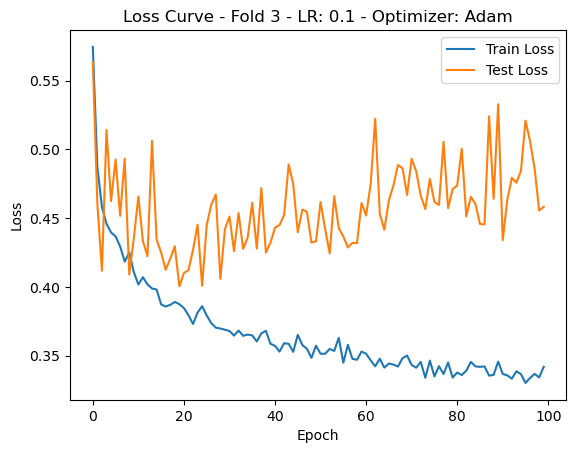

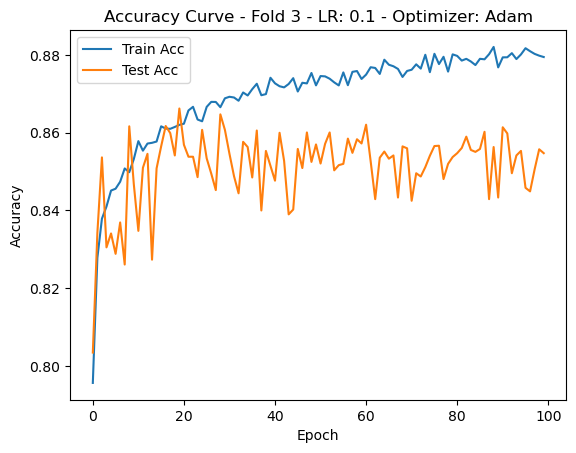

Fold 4


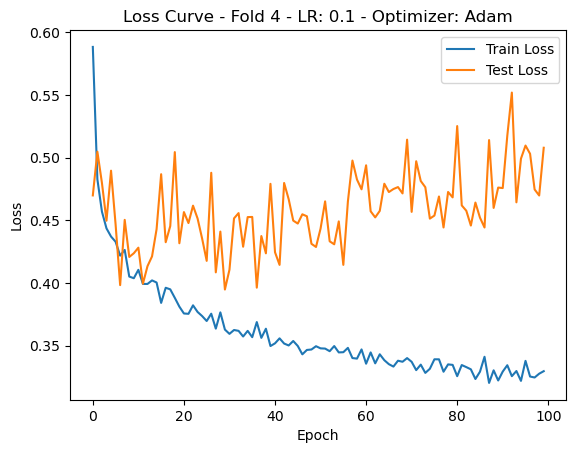

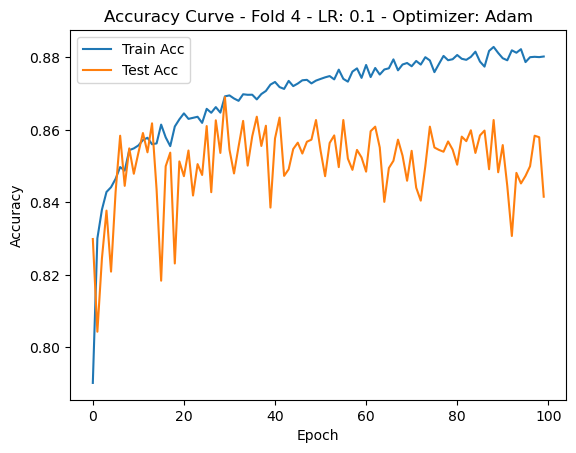

Fold 5


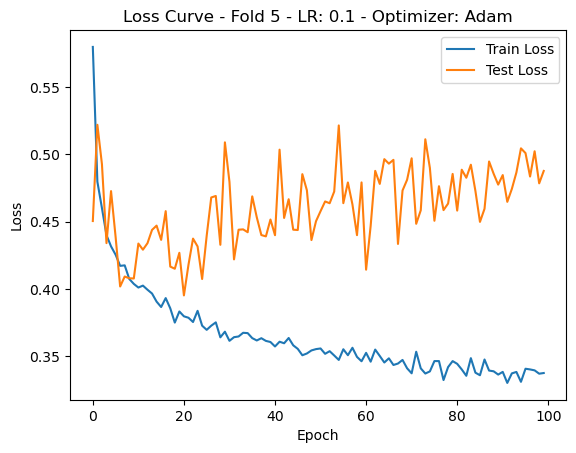

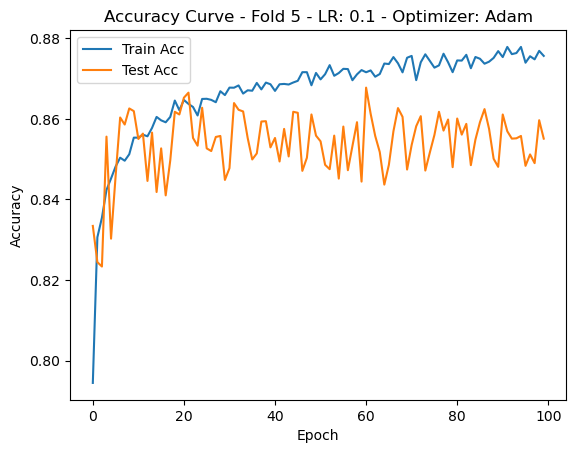

In [114]:
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['SGD', 'Adam']

# Step 9: Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

for lr in learning_rates:
    for optimizer_name in optimizers:
        print(f"Learning Rate: {lr}, Optimizer: {optimizer_name}")
        fold = 0
        for train_index, test_index in kf.split(train_tensor):
            fold += 1
            print(f"Fold {fold}")
            train_data_fold, val_data_fold = train_tensor[train_index], train_tensor[test_index]
            train_labels_fold, val_labels_fold = train_labels_tensor[train_index], train_labels_tensor[test_index]
    
            # Step 10: Initialize ANN model
            input_size = train_tensor.shape[1]
            hidden_size = 128
            num_classes = 10
            model = ANN(input_size, hidden_size, num_classes, activation='relu')
    
            # Step 11: Loss function and optimizer
            criterion = nn.CrossEntropyLoss()
            if optimizer_name == 'SGD':
                optimizer = optim.SGD(model.parameters(), lr=lr)
            elif optimizer_name == 'Adam':
                optimizer = optim.Adam(model.parameters(), lr=lr)
    
            # Step 12: Convert to DataLoader
            train_dataset = torch.utils.data.TensorDataset(train_data_fold, train_labels_fold)
            train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
            val_dataset = torch.utils.data.TensorDataset(val_data_fold, val_labels_fold)
            val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
    
            # Step 13: Train the model with k-fold cross-validation
            train_losses, test_losses, train_accs, test_accs = train_model_with_cv(model, criterion, optimizer,
                                                                                 train_loader, val_loader, num_epochs=100)
    
            # Step 14: Plot loss and accuracy curves
            plt.plot(train_losses, label='Train Loss')
            plt.plot(test_losses, label='Test Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'Loss Curve - Fold {fold} - LR: {lr} - Optimizer: {optimizer_name}')
            plt.legend()
            plt.show()
    
            plt.plot(train_accs, label='Train Acc')
            plt.plot(test_accs, label='Test Acc')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'Accuracy Curve - Fold {fold} - LR: {lr} - Optimizer: {optimizer_name}')
            plt.legend()
            plt.show()
            
            test_losses_final_ex4.append(test_losses[-1])
            test_accs_final_ex4.append(test_accs[-1])

In [120]:
test_accs_final[-1].item()

0.8813333333333333

In [137]:
len(test_losses_final_ex4)
test_accs_final_ex4[9]

tensor(0.8866, dtype=torch.float64)

In [115]:
print("Final Test Loss:", test_losses_final_ex4)
print("Final Test Accuracy:", test_accs_final_ex4)

Final Test Loss: [0.3442126672635687, 0.4487724941857952, 0.38597728129714093, 0.3428372612341921, 0.33856768929894937, 0.33642703643504607, 0.3318880659310108, 0.3389092959622119, 0.6555760960550384, 0.6633942217585889, 0.6454884766977518, 0.6571628928699709, 0.6930151163263524, 0.43583121408331904, 0.40342848078209037, 0.42045425560246125, 0.4131559869868958, 0.4789020315684537, 0.7549356696037377, 0.8191604191794041, 0.897578904127821, 0.8167283637250992, 0.7855472467601934, 0.6490821618428255, 0.6148518625884614, 0.572231448235664, 0.6198943847433683, 0.6458836373813609, 0.5045786234847409, 0.5093335687638597, 0.4582514356266945, 0.5078651261456469, 0.4877261278477121]
Final Test Accuracy: [tensor(0.8798, dtype=torch.float64), tensor(0.8730, dtype=torch.float64), tensor(0.8635, dtype=torch.float64), tensor(0.8800, dtype=torch.float64), tensor(0.8844, dtype=torch.float64), tensor(0.8821, dtype=torch.float64), tensor(0.8808, dtype=torch.float64), tensor(0.8808, dtype=torch.float64), 

In [151]:
dict = {
    'Experiment Number' : [1,2,3,4,5,6,7,8,9],
    'learning_rate':[0.01,0.01,0.01,0.01,0.01,0.01,0.001,0.01,0.1],
    'batch_size':[64,64,64,64,64,64,64,64,64],
    'hidden layer size':[128,64,128,256,128,128,128,128,128],
    'Activation Functions':['relu','relu','relu','relu','relu','sigmoid','relu','relu','relu'],
    'Number of Epochs' : [100,100,100,100,100,100,100,100,100],
    'Test Loss' : [test_losses_final[-1],results[0][-1]['test_losses'][-1],results[1][-1]['test_losses'][-1],results[2][-1]['test_losses'][-1],test_losses_final_ex3[0],test_losses_final_ex3[1],test_losses_final_ex4[9],test_losses_final_ex4[19],test_losses_final_ex4[29]],
    'Test Accuracy ': [test_accs_final[-1].item(),results[0][-1]['test_accs'][-1].item(),results[1][-1]['test_accs'][-1].item(),results[2][-1]['test_accs'][-1].item(),test_accs_final_ex3[0].item(),test_accs_final_ex3[1].item(),test_accs_final_ex4[9].item(),test_accs_final_ex4[19].item(),test_accs_final_ex4[29].item()]
 
}

dd = pd.DataFrame(dict)
dd

Experiment Number  learning_rate  batch_size  hidden layer size  \
0                  1          0.010          64                128   
1                  2          0.010          64                 64   
2                  3          0.010          64                128   
3                  4          0.010          64                256   
4                  5          0.010          64                128   
5                  6          0.010          64                128   
6                  7          0.001          64                128   
7                  8          0.010          64                128   
8                  9          0.100          64                128   

  Activation Functions  Number of Epochs  Test Loss  Test Accuracy   
0                 relu               100   0.425712        0.881333  
1                 relu               100   0.417740        0.874333  
2                 relu               100   0.383722        0.893167  
3                 relu               100   0.517161        0.861500  
4                 relu               100   0.442893        0.878750  
5              sigmoid               100   0.393950        0.856000  
6                 relu               100   0.663394        0.886583  
7                 relu               100   0.819160        0.878250  
8                 relu               100   0.509334        0.838583

### After all experiments with various parameters, I use the Adam optimizer with an appropriate learning rate for the final model.

##### I use this Model Architecture: Utilizing a Sequential model consisting of multiple layers including BatchNormalization, Dropout, and Dense layers with ReLU activation functions.

##### Optimization Strategy: Employing the Adam optimizer to efficiently adjust model parameters during training.

##### Loss Function: Utilizing categorical cross-entropy as the loss function to measure the difference between predicted and actual labels.

##### Performance Monitoring: Employing early stopping with a patience of 5 epochs to prevent overfitting and restore the best model weights.

##### Training Process: Training the model with the specified architecture and optimization strategy on the training data for up to 200 epochs.

##### Visualization: Plotting the training and validation loss, as well as accuracy, to observe model performance throughout the training process.

#####  Evaluation: Finally, evaluating the trained model on the test dataset to assess its performance in terms of loss and accuracy.






In [38]:
y_train = keras.utils.to_categorical(train_labels, 10)

In [39]:
y_test = keras.utils.to_categorical(test_labels, 10)

In [40]:
X_test, X_val, y_test, y_val = train_test_split(test_data, y_test, test_size=0.5, random_state=42)

Epoch 1/200
118/118 [==============================] - 1s 9ms/step - loss: 0.6557 - accuracy: 0.7728 - val_loss: 0.4519 - val_accuracy: 0.8406
Epoch 2/200
118/118 [==============================] - 1s 9ms/step - loss: 0.4417 - accuracy: 0.8402 - val_loss: 0.3506 - val_accuracy: 0.8714
Epoch 3/200
118/118 [==============================] - 1s 8ms/step - loss: 0.3931 - accuracy: 0.8581 - val_loss: 0.3260 - val_accuracy: 0.8812
Epoch 4/200
118/118 [==============================] - 1s 8ms/step - loss: 0.3676 - accuracy: 0.8651 - val_loss: 0.3268 - val_accuracy: 0.8784
Epoch 5/200
118/118 [==============================] - 1s 8ms/step - loss: 0.3402 - accuracy: 0.8753 - val_loss: 0.3135 - val_accuracy: 0.8834
Epoch 6/200
118/118 [==============================] - 1s 9ms/step - loss: 0.3284 - accuracy: 0.8781 - val_loss: 0.3042 - val_accuracy: 0.8888
Epoch 7/200
118/118 [==============================] - 1s 9ms/step - loss: 0.3119 - accuracy: 0.8846 - val_loss: 0.2908 - val_accuracy: 0.8924

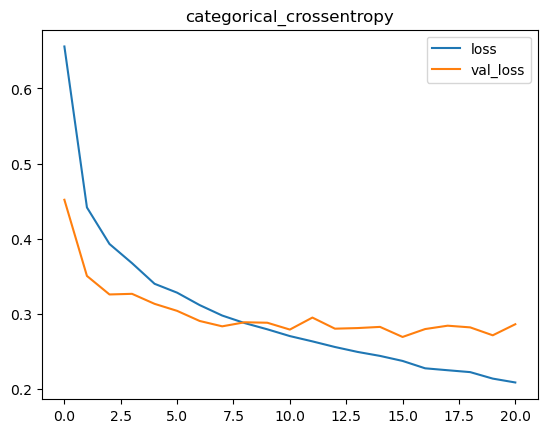

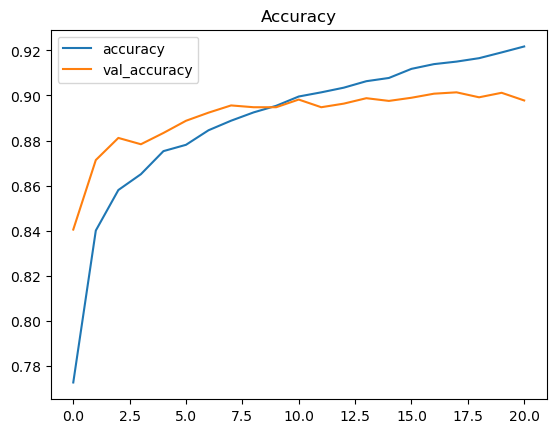

In [41]:
# define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[train_data.shape[1]]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_data, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="categorical_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

print('Test Loss and Accuracy : ' ,model.evaluate(X_test , y_test))